Chapter 9 - Support Vector Machines, q7

# (a)

In [78]:
library(ISLR)

In [79]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [80]:
Auto = na.omit(Auto)
mpg.bin = rep(0,length(Auto$mpg))
mpg.bin[Auto$mpg>median(Auto$mpg)]=1

# (b)

In [86]:
set.seed(1)
library(e1071)
Auto.copy = Auto[,c(-1,-9)]
Auto.copy$mpgbin = as.factor(mpg.bin)
range = list(cost=c(0.001,0.01,1,10,100,1000,10000))
tune.linear = tune(svm,mpgbin~.,data=Auto.copy,kernel="linear",ranges=range)
summary(tune.linear)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  100

- best performance: 0.08679487 

- Detailed performance results:
   cost      error dispersion
1 1e-03 0.13544872 0.05715486
2 1e-02 0.09179487 0.05812971
3 1e+00 0.09192308 0.05827672
4 1e+01 0.08935897 0.05443327
5 1e+02 0.08679487 0.05567394
6 1e+03 0.08679487 0.05567394
7 1e+04 0.08679487 0.05567394


The cost of 100 gives the best performance.

# (c)

In [87]:
set.seed(435)
r = list(cost=c(0.001,0.1,1,10,100),degree=c(2,3,4,5))
tune.poly = tune(svm,mpgbin~.,data=Auto.copy,kernel="polynomial",ranges=r)
summary(tune.poly)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      3

- best performance: 0.07660256 

- Detailed performance results:
    cost degree      error dispersion
1  1e-03      2 0.55615385 0.03580090
2  1e-01      2 0.27775641 0.08863687
3  1e+00      2 0.24737179 0.08424249
4  1e+01      2 0.18871795 0.05511926
5  1e+02      2 0.18096154 0.06255106
6  1e-03      3 0.41044872 0.11130573
7  1e-01      3 0.19352564 0.10229418
8  1e+00      3 0.09698718 0.03773779
9  1e+01      3 0.07910256 0.03292568
10 1e+02      3 0.07660256 0.03210146
11 1e-03      4 0.45128205 0.08086075
12 1e-01      4 0.26256410 0.08291270
13 1e+00      4 0.24987179 0.12276261
14 1e+01      4 0.15814103 0.04897224
15 1e+02      4 0.14564103 0.06658841
16 1e-03      5 0.40294872 0.08839452
17 1e-01      5 0.25737179 0.08109826
18 1e+00      5 0.12519231 0.04455940
19 1e+01      5 0.12512821 0.04114766
20 1e+02      5 0.10724359 0.03787305


The cost of 100 and degree 3 gives the best result

In [88]:
set.seed(435)
r = list(cost=c(0.001,0.1,1,10,100),gamma=c(1,2,3,4))
tune.radial = tune(svm,mpgbin~.,data=Auto.copy,kernel="radial",ranges=r)
summary(tune.radial)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     1

- best performance: 0.06634615 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-03     1 0.55615385 0.03580090
2  1e-01     1 0.08653846 0.04806505
3  1e+00     1 0.06634615 0.04045775
4  1e+01     1 0.08416667 0.04682759
5  1e+02     1 0.10711538 0.04639110
6  1e-03     2 0.55615385 0.03580090
7  1e-01     2 0.11711538 0.07888410
8  1e+00     2 0.07147436 0.03789378
9  1e+01     2 0.10217949 0.06056341
10 1e+02     2 0.10730769 0.06035801
11 1e-03     3 0.55615385 0.03580090
12 1e-01     3 0.32173077 0.10422115
13 1e+00     3 0.07916667 0.04912230
14 1e+01     3 0.10205128 0.04984892
15 1e+02     3 0.10974359 0.05000986
16 1e-03     4 0.55615385 0.03580090
17 1e-01     4 0.53064103 0.05619358
18 1e+00     4 0.08429487 0.04545334
19 1e+01     4 0.10461538 0.05195850
20 1e+02     4 0.10717949 0.04657610


cost 1 and gamma 1 gives the best result

# (d)

In [110]:
names=names(Auto.copy)
names

[1] "cylinders"    "displacement" "horsepower"   "weight"       "acceleration"
[6] "year"         "origin"       "mpgbin"

In [111]:
names = names[c(-4,-8)]

# Linear Kernel

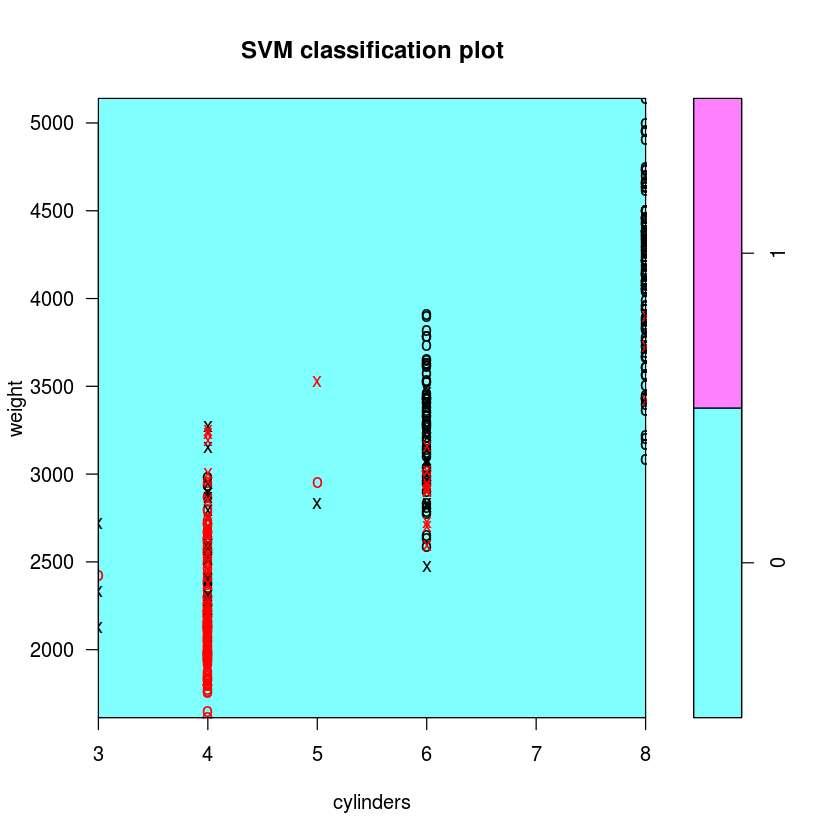

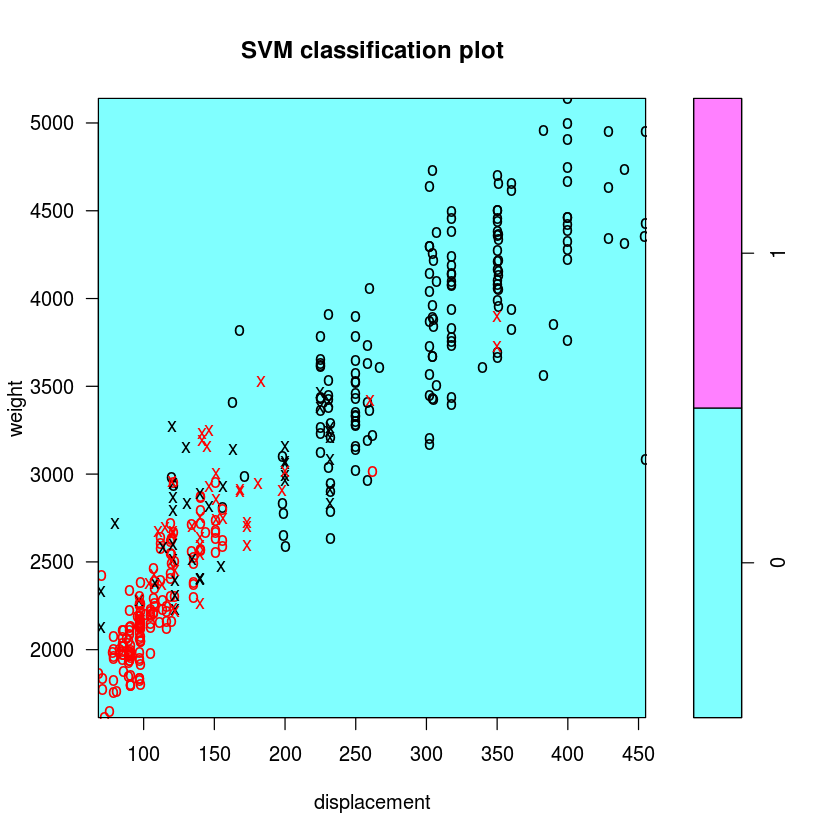

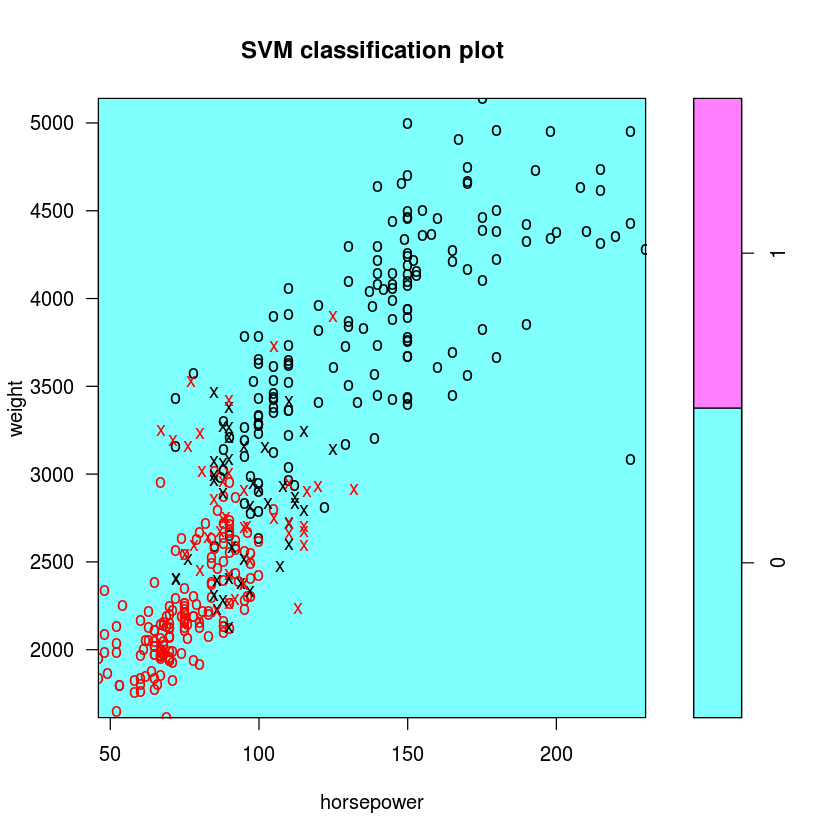

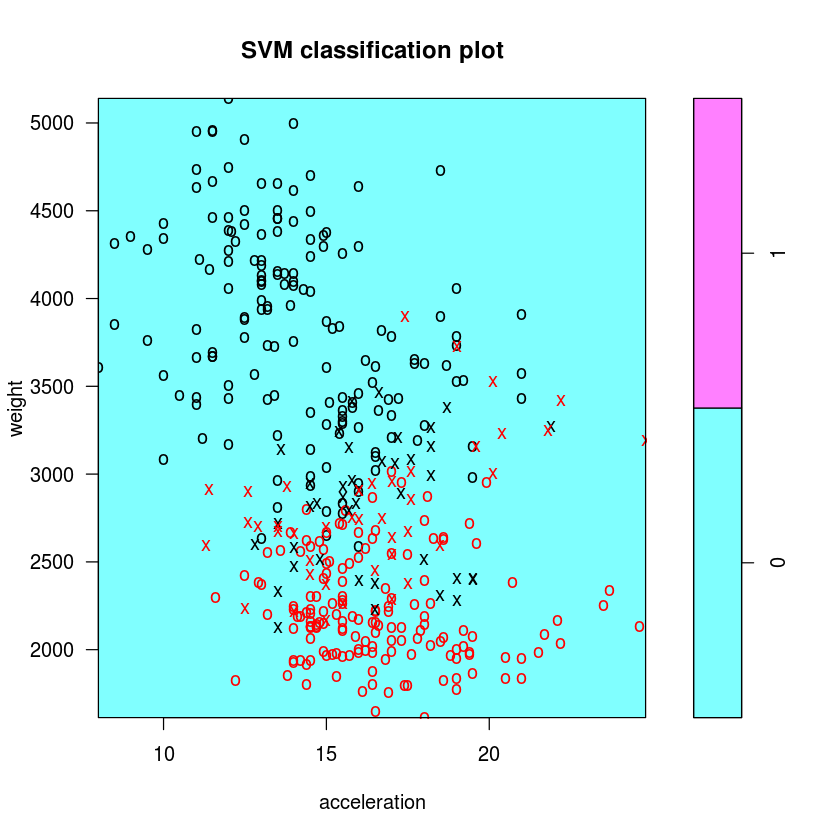

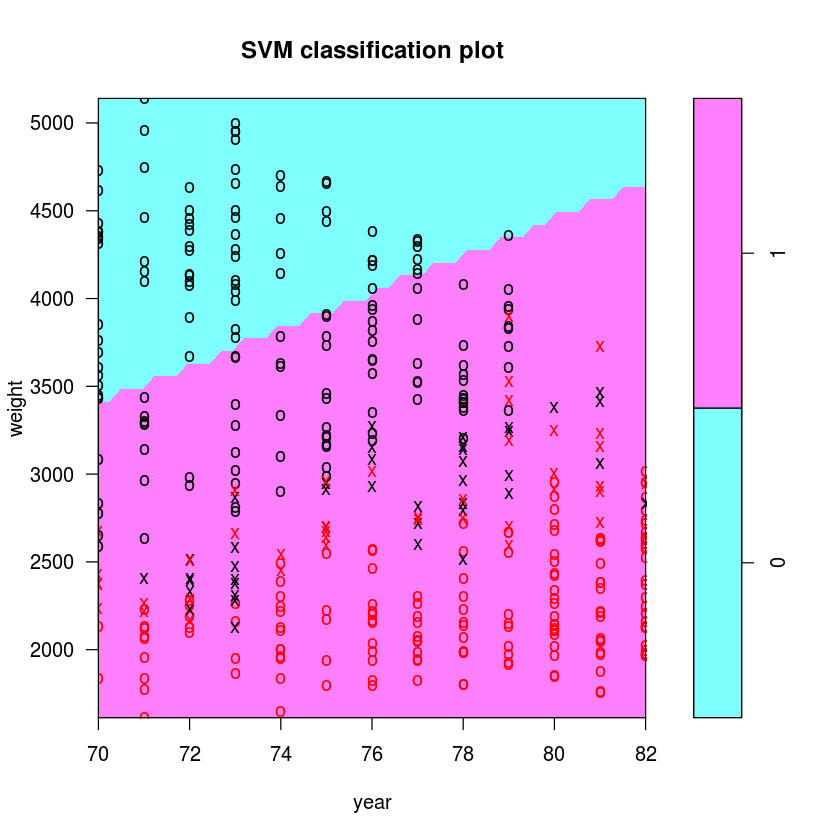

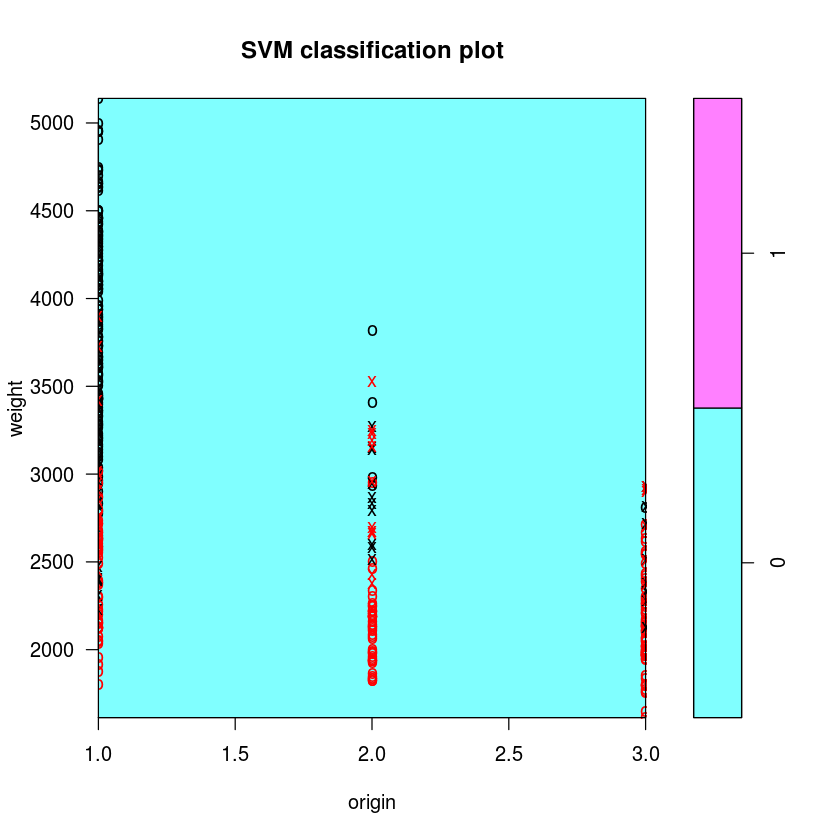

In [117]:
for(name in names){
    plot(tune.linear$best.model,Auto.copy,as.formula(paste("weight~",name,sep="")))
}

# Ploynomial Kernel

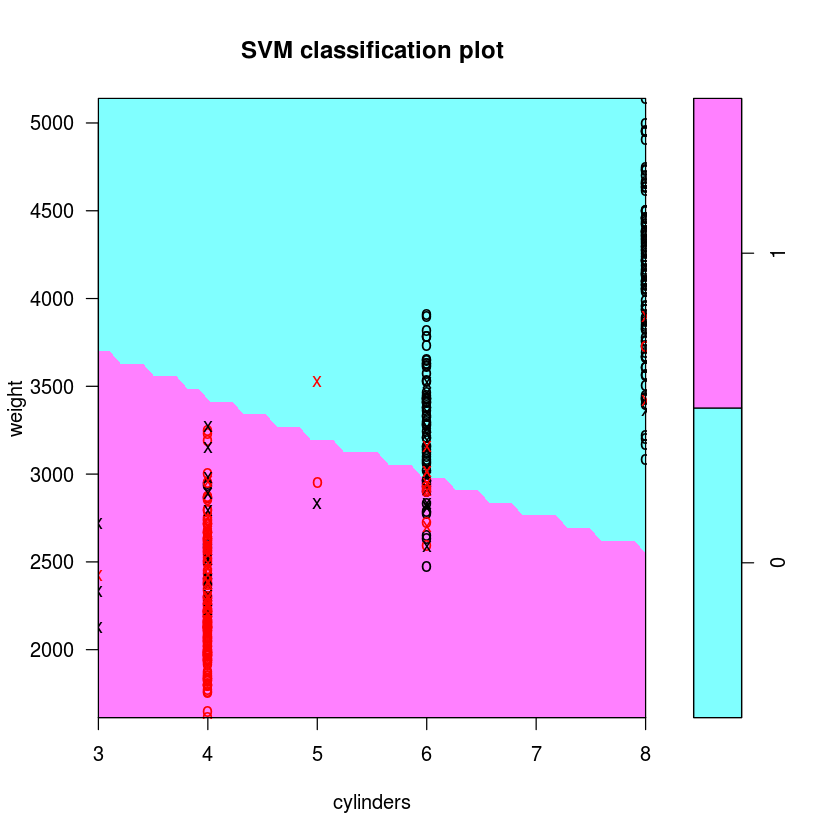

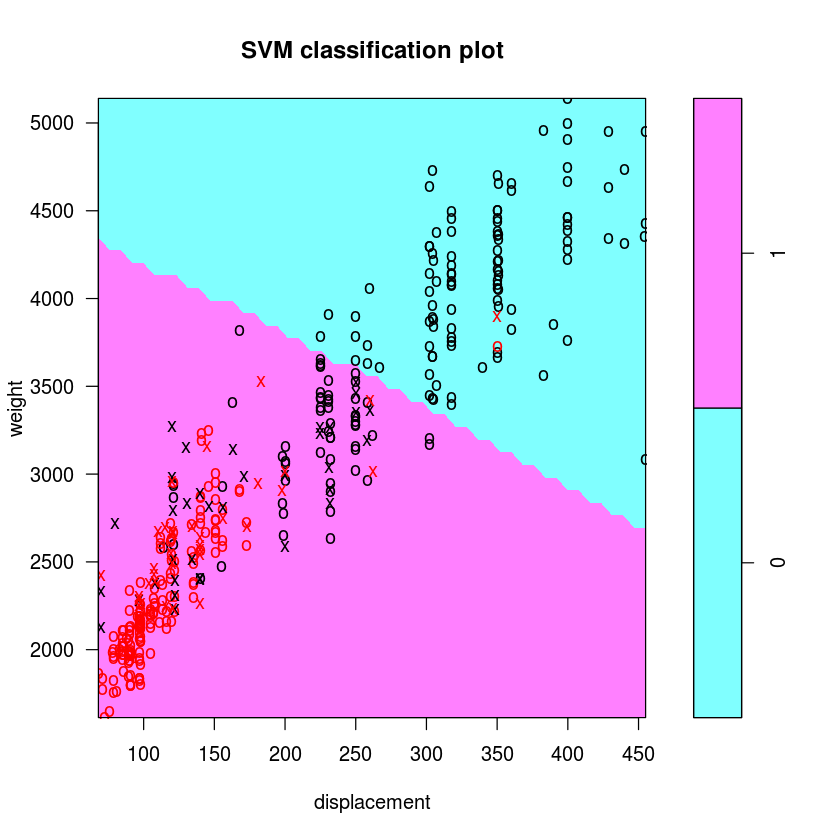

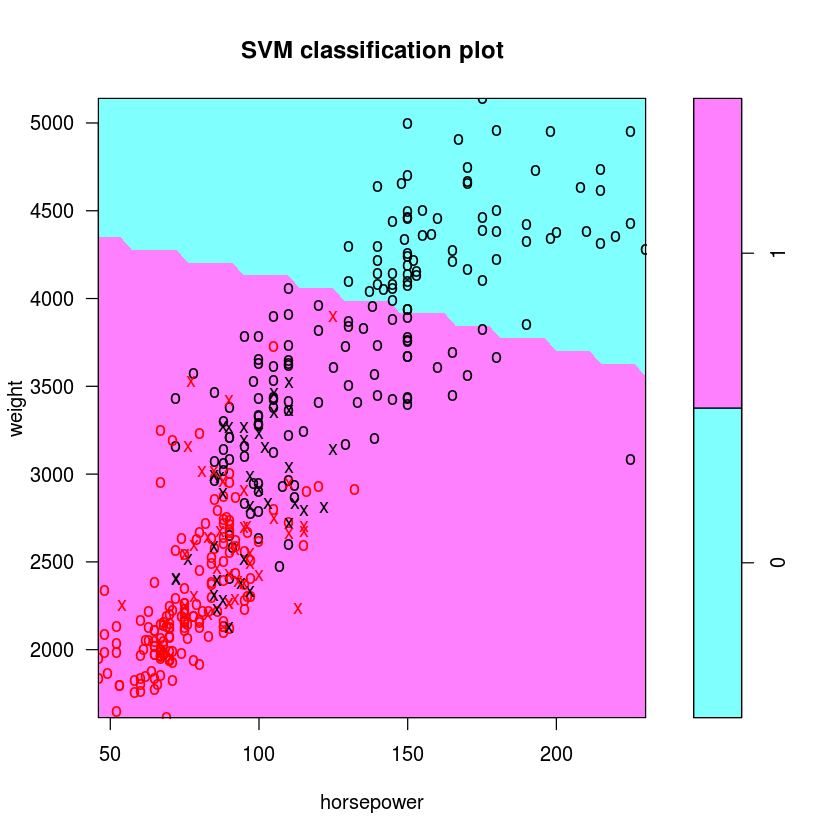

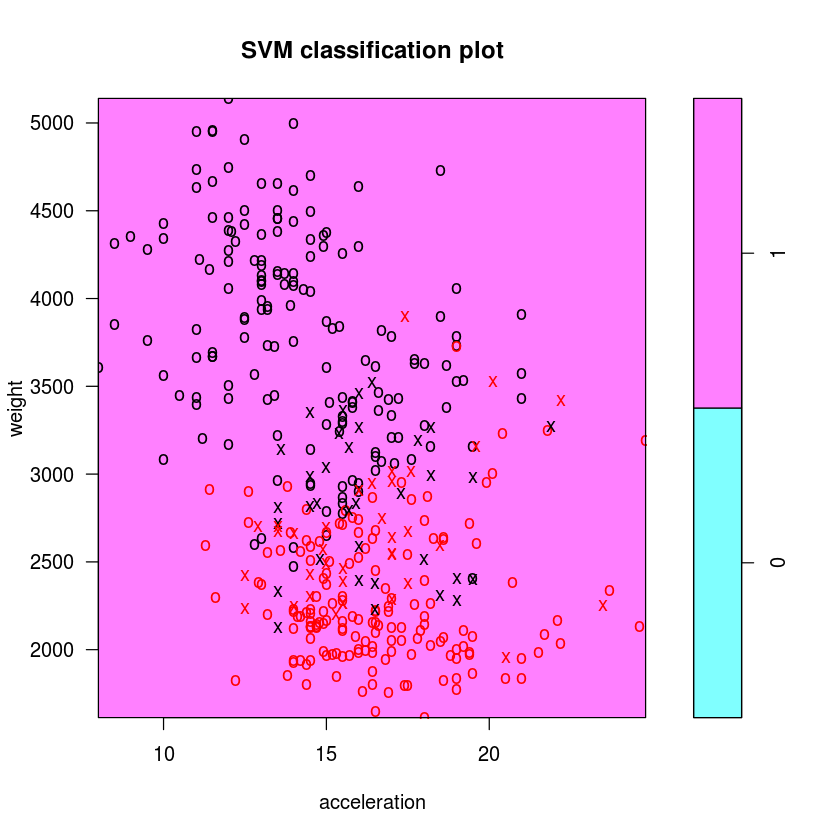

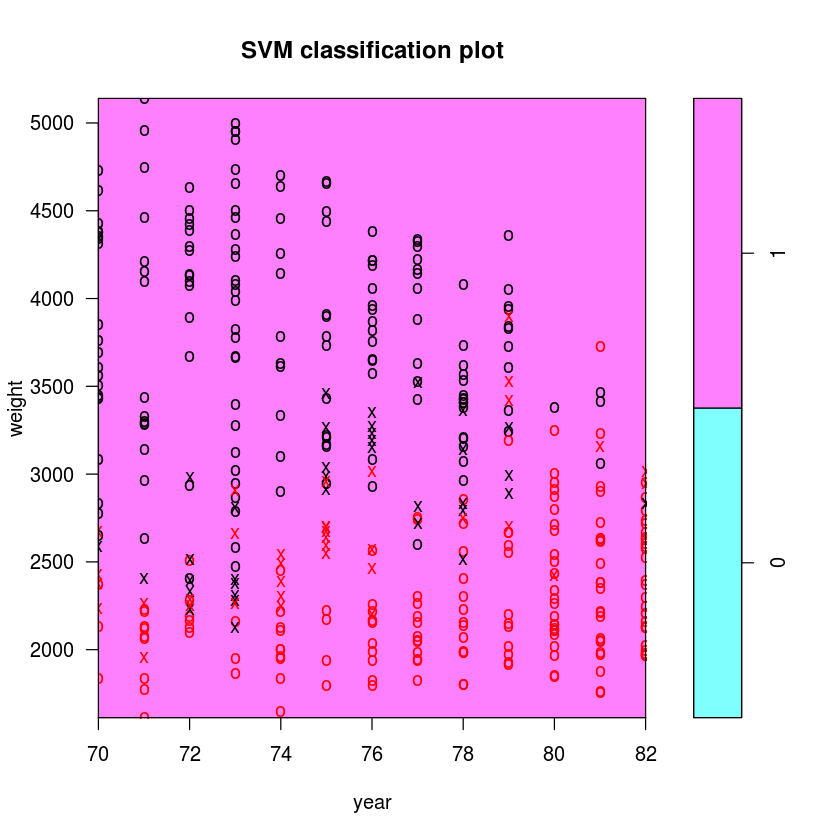

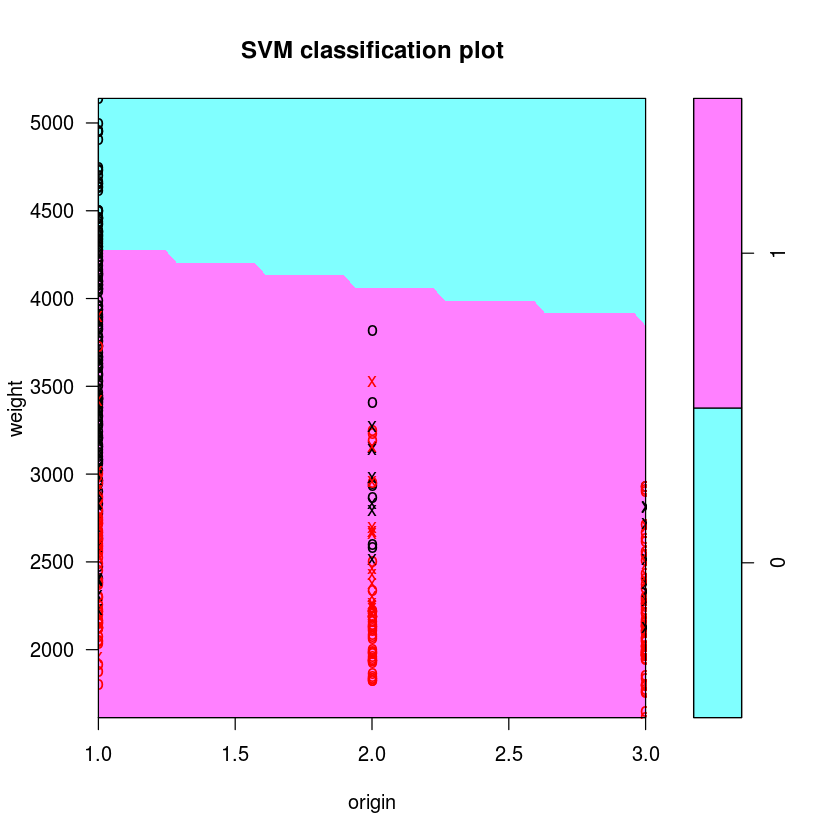

In [118]:
for(name in names){
    plot(tune.poly$best.model,Auto.copy,as.formula(paste("weight~",name,sep="")))
}

# Radial Kernel

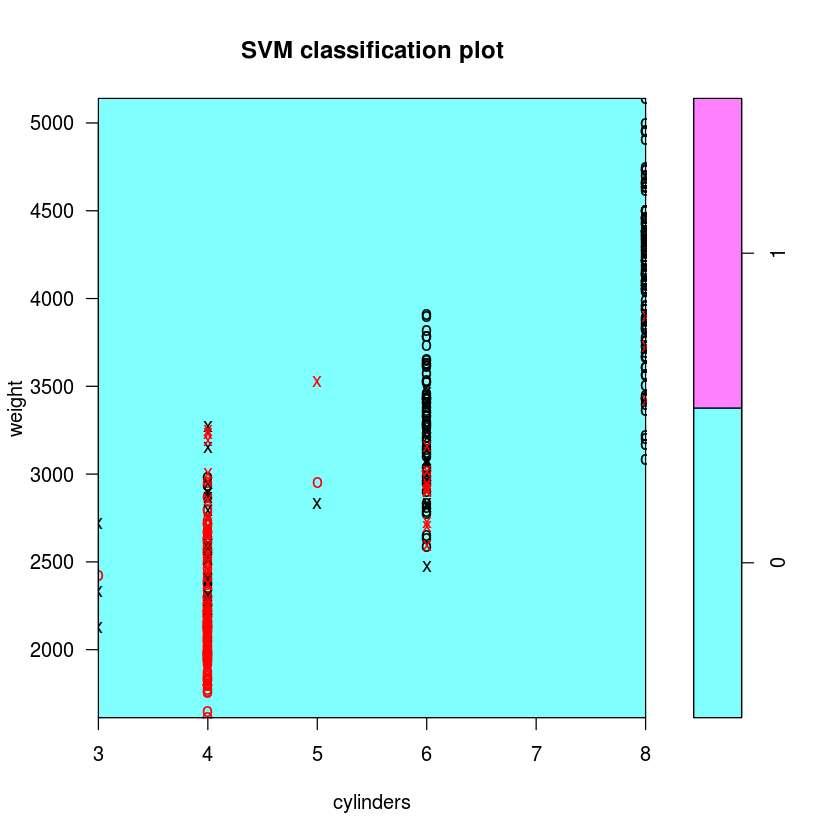

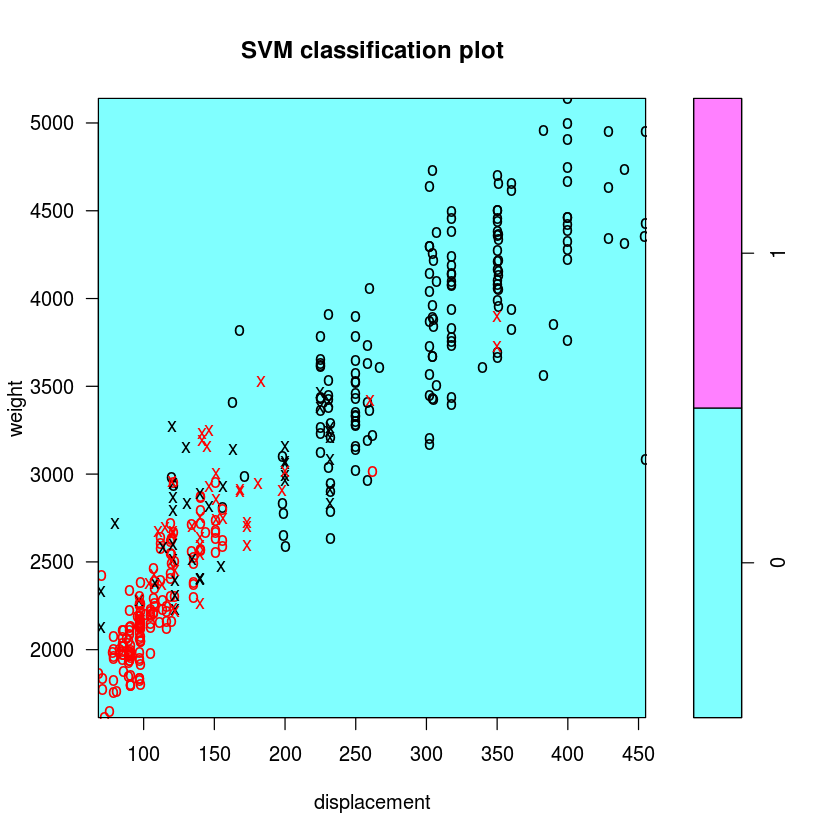

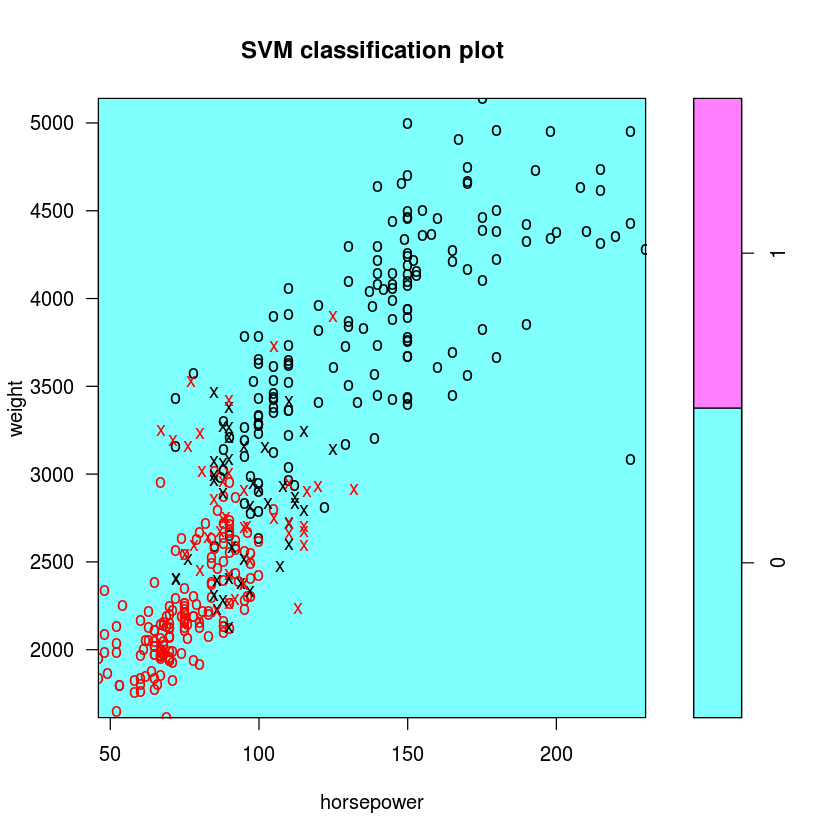

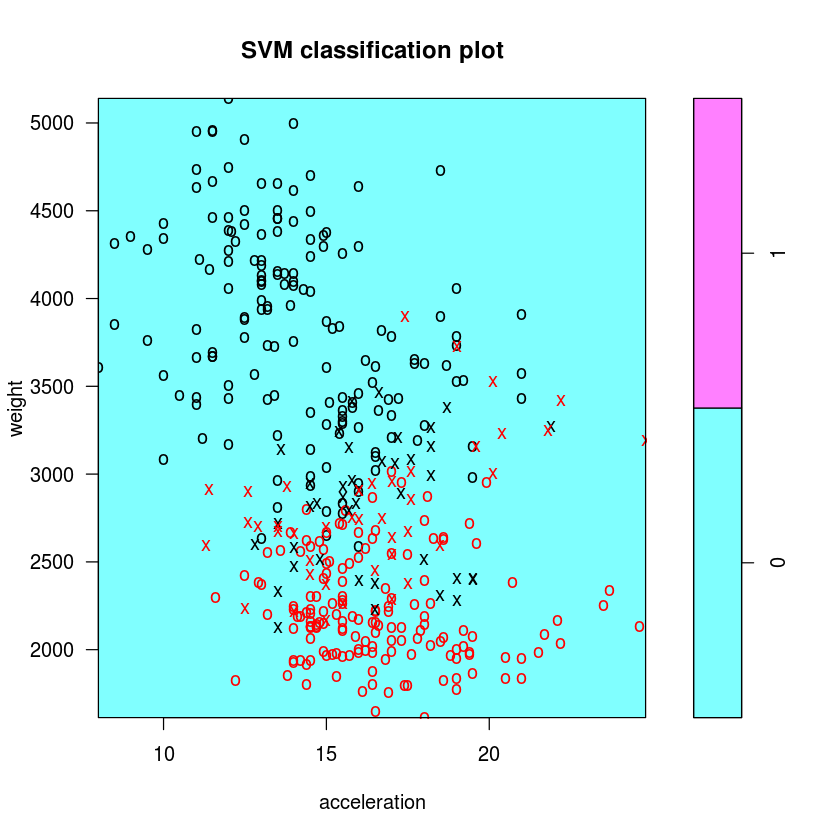

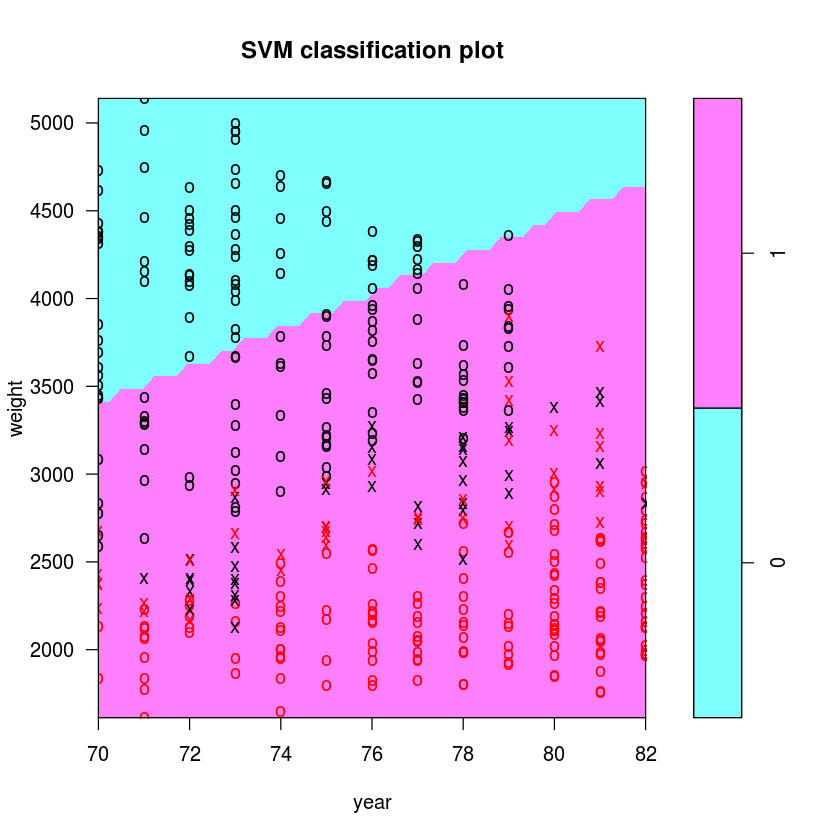

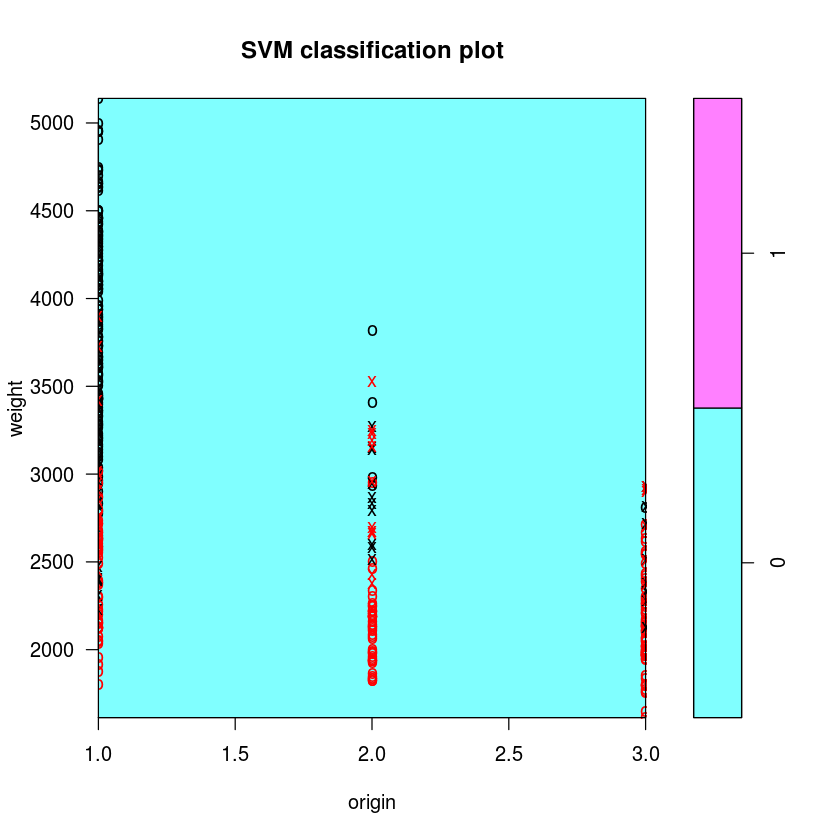

In [119]:
for(name in names){
    plot(tune.linear$best.model,Auto.copy,as.formula(paste("weight~",name,sep="")))
}